# Machine Learning for Basketball Memorabilia Investments
In this assignment you will use real data on past basketball players to use ML to inform memorabilia investmentdecisions.

You are provided with data on past players that includes 27 different predictors/attributes on each player. Note that the attribute names are often abbreviated and the complete list is included at the end of this notebook.

You will use the historical data set, Hall-of-fame-train.arff (495 players), to build a classification model predicting whether or not a given player will be inducted (and the probability thereof). You will then apply your model to
select players to invest in. The goal of this assignment is to develop hands-on experience in developing and evaluating machine learning models to inform interventions (investment decisions in this case) and to maximize profitability.

The data set includes a target variable (i.e., the class) which indicates whether or not the player has been inducted to the hall of fame. Note that in this data set, we assume that a player who has not been inducted 45.4 years after retirement, will not be inducted. The target variable is binary and has value 1 if the player has been inducted or 0 otherwise. Note that the data includes the actual target variable value for each player. This information is available for this assignment in order to allow you to evaluate the efficacy of investment decisions and to compare amongst investments selected by different models to identify the best model to use in the future.

In [ ]:
#use ML to inform memorabilia investment decisions
#data uses 27 predictors/attributes on each player
#use Hall-of-fame-train.arff (495 players), to build classification model
#predicts if player will be inducted (probability of) and apply to select players to invest in
#maximize profitability
#data includes target variable (binary)
#assume >45.4 years of retirement,  player not inducted
#evaluate investment decision efficacy and compare by different models to identify which model to best use

## 1. Read in Libraries and NBA data

(run these cells before starting)

In [ ]:
!pip install liac-arff


  Preparing metadata (setup.py) ... done
  Created wheel for liac-arff: filename=liac_arff-2.5.0-py3-none-any.whl size=11716 sha256=550ef9e3df198471c2bea673d406200d4389dcc3bddcca14bff8fa5fc14c8f1b
  Stored in directory: /root/.cache/pip/wheels/5d/2a/9c/3895d9617f8f49a0883ba686326d598e78a1c2f54fe3cae86d
Successfully built liac-arff


In [ ]:
# import libraries
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import requests
import arff
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score, confusion_matrix,accuracy_score, roc_curve, auc # plot evaluations
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import randint

In [ ]:
# get data from online
df_arff = requests.get('https://utexas.box.com/shared/static/u8s1nl2c8b3ijv94z7npg7jl0drml5u0.arff')

# read as arff file
df_arff = arff.load(df_arff.text)
col_val = [attribute[0] for attribute in df_arff['attributes']]

# transform arff file into pandas dataframe
new_df = pd.DataFrame(df_arff['data'], columns = col_val)
meta = df_arff['attributes']

def clean_df(df):
  cols = list(df.columns)
  for col in cols:
    try:
      # df = df.replace({col: {'YES': True, 'NO': False}})
            df = df.replace({col: {'1': True, '0': False}})
    except:
      pass
    pass
  return df

new_df = clean_df(new_df)
new_df = pd.get_dummies(new_df)

In [ ]:
# read in csv data
df_csv = pd.read_csv('https://utexas.box.com/shared/static/24dmtadnoxzjqwm04tpdjseqz1msclyk.csv')
#df_csv

In [ ]:
new_df


,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,firstSeason,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G
0,408.0,9825.0,5232.0,476.0,824.0,1300.0,866.0,265.0,175.0,700.0,...,1982.0,1990.0,1.0,14.0,False,0,1,0,0,1
1,51.0,0.0,587.0,0.0,0.0,0.0,158.0,0.0,0.0,0.0,...,1949.0,1949.0,1.0,55.0,False,0,1,0,0,1
2,265.0,0.0,1712.0,0.0,0.0,72.0,311.0,0.0,0.0,0.0,...,1946.0,1950.0,1.0,54.0,False,0,1,0,0,1
3,133.0,2587.0,992.0,55.0,198.0,253.0,291.0,123.0,14.0,207.0,...,2003.0,2004.0,0.0,0.0,False,0,1,0,0,1
4,8.0,28.0,7.0,0.0,2.0,2.0,0.0,0.0,0.0,1.0,...,2004.0,2004.0,0.0,0.0,False,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
490,262.0,5229.0,2508.0,214.0,468.0,682.0,507.0,319.0,101.0,289.0,...,1976.0,1979.0,1.0,25.0,False,0,1,0,0,1
491,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1946.0,1946.0,1.0,58.0,False,0,1,0,1,0
492,814.0,19241.0,9948.0,140.0,282.0,4555.0,1112.0,89.0,16.0,0.0,...,1963.0,1974.0,1.0,30.0,False,0,1,0,1,0
493,98.0,1220.0,345.0,71.0,248.0,319.0,48.0,27.0,42.0,85.0,...,2000.0,2002.0,1.0,2.0,False,0,1,0,1,0


## 2. Exploring the Data

### 2.1 Building, Evaluating, and Comparing Different Machine Learning Models (5 points)

**IMPORTANT: When training these models you MUST use `random_state=3` on each of the classifiers and Naive Bayes. Failure to do so will be (-5 points)**

In [ ]:
X = new_df.drop(columns='class')
y = new_df['class']

#Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 6,random_state=3, min_samples_leaf = 1, min_samples_split = 3).fit(X,y)

#Bagging
base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5, min_samples_leaf=1)
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=5, random_state=3).fit(X, y)

#Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X, y)

#Naive Bayes
MultinomiaNB_model = MultinomialNB(alpha=0.1, fit_prior=True).fit(X,y) # alpha is usually > 0.1 , < 5,

#K Nearest Neighbors
KNeighbors_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto').fit(X,y)

models = [decision_tree_model, bagging_model, random_forest_model, MultinomiaNB_model, KNeighbors_model]

for model in models:
    # Convert X to NumPy array
    X_array = X.values
    # Using 10-fold cross validation
    acc_score = cross_val_score(model, X_array, y, cv=10, scoring="accuracy")
    roc_score = cross_val_score(model, X_array, y, cv=10, scoring="roc_auc")

    print(f'{model.__class__.__name__} Accuracy Score: {acc_score.mean()}')
    print(f'{model.__class__.__name__} ROC AUC: {roc_score.mean()}\n')


# build and compare the results of your models using 10-fold cross validation here (display results for each)
# play with the parameters of each model to try and generate the best result

DecisionTreeClassifier Accuracy Score: 0.9777551020408163
DecisionTreeClassifier ROC AUC: 0.9155555555555555

BaggingClassifier Accuracy Score: 0.9756734693877551
BaggingClassifier ROC AUC: 0.932

RandomForestClassifier Accuracy Score: 0.9675918367346938
RandomForestClassifier ROC AUC: 0.9662222222222223

MultinomialNB Accuracy Score: 0.8866938775510202
MultinomialNB ROC AUC: 0.8939444444444444

KNeighborsClassifier Accuracy Score: 0.9697142857142855
KNeighborsClassifier ROC AUC: 0.9105555555555555



In [ ]:
#Output for all models

#DecisionTreeClassifier Accuracy Score: 0.9777551020408163
#DecisionTreeClassifier ROC AUC: 0.9155555555555555

#BaggingClassifier Accuracy Score: 0.9756734693877551
#BaggingClassifier ROC AUC: 0.932

#RandomForestClassifier Accuracy Score: 0.9675918367346938
#RandomForestClassifier ROC AUC: 0.9662222222222223

#MultinomialNB Accuracy Score: 0.8866938775510202
#MultinomialNB ROC AUC: 0.8939444444444444

#KNeighborsClassifier Accuracy Score: 0.9697142857142855
#KNeighborsClassifier ROC AUC: 0.9105555555555555


In [ ]:
#grid: evaluates all possible combinations of hyperparameters
#random: evaluates random combinations of specified hyperparameters

In [ ]:
#grid search on decision tree

decision_tree_model = DecisionTreeClassifier(criterion='entropy', max_depth=5, random_state=3)

# parameters to test
param_grid = {
    'criterion': ['entropy'],
    'max_depth': range(1, 11),  # Change to a range for grid search
    'min_samples_split': range(2, 21),  # Change to a range for grid search
    'min_samples_leaf': range(1, 11)  # Change to a range for grid search
}

# grid search instance
grid_search = GridSearchCV(
    decision_tree_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

# fit the model to the data and find the best parameters
grid_search.fit(X, y)

# print results
print("Best Hyperparameters:", grid_search.best_params_, "\n")
print("Best Accuracy Score:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3} 

Best Accuracy Score: 0.9777551020408163


In [ ]:
#Output for decision tree

#Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 1, 'min_samples_split': 3}

#Best Accuracy Score: 0.9777551020408163

In [ ]:
#grid search on bagging

base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=3)

bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=10, random_state=3)

param_grid = {
    'n_estimators': [5, 10, 20],
    'base_estimator__criterion': ['entropy'],
    'base_estimator__max_depth': [2, 3, 4],
    'base_estimator__min_samples_split': [2, 5],
    'base_estimator__min_samples_leaf': [1, 2]
}

grid_search = GridSearchCV(
    bagging_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_, "\n")
print("Best Accuracy Score:", grid_search.best_score_)


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_est

Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 5, 'n_estimators': 5} 

Best Accuracy Score: 0.9756734693877551


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:674: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  estimator = estimator.set_params(**cloned_parameters)
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:905: FutureWarning: Parameter 'base_estimator' of BaggingClassifier is deprecated in favor of 'estimator'. See BaggingClassifier's docstring for more details.
  clone(base_estimator).set_params(**self.best_params_)


In [ ]:
#Output for bagging

#Best Hyperparameters: {'base_estimator__criterion': 'entropy', 'base_estimator__max_depth': 4, 'base_estimator__min_samples_leaf': 1, 'base_estimator__min_samples_split': 5, 'n_estimators': 5}

#Best Accuracy Score: 0.9756734693877551

In [ ]:
#grid search on decision tree

random_forest_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=None,
                                             min_samples_split=2, min_samples_leaf=1, random_state=3, max_features=2)
param_grid = {
    'n_estimators': [50, 100, 200],
    'criterion': ['entropy'],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
}

grid_search = GridSearchCV(
    random_forest_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

grid_search.fit(X, y)

print("Best Hyperparameters:", grid_search.best_params_, "\n")
print("Best Accuracy Score:", grid_search.best_score_)


Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50} 

Best Accuracy Score: 0.9736326530612244


In [ ]:
#Output for random forest

#Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}

#Best Accuracy Score: 0.9736326530612244

In [ ]:
#grid search on kneighbors

# Define the parameter grid for grid search
param_grid = {
    'n_neighbors': range(1, 16),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a KNeighborsClassifier instance
knn_model = KNeighborsClassifier()

# Perform grid search
grid_search = GridSearchCV(knn_model, param_grid=param_grid, scoring='accuracy', cv=5)
grid_search.fit(X, y)

# Get the best parameters and model
best_params_grid = grid_search.best_params_
best_model_grid = grid_search.best_estimator_

print("Best Parameters (Grid Search):", best_params_grid)
print("Best Model (Grid Search):", best_model_grid)


Best Parameters (Grid Search): {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'distance'}
Best Model (Grid Search): KNeighborsClassifier(weights='distance')


In [ ]:
#Output for KNeighbors

#Best Parameters (Grid Search): {'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

#Best Model (Grid Search): KNeighborsClassifier()

In [ ]:
#grid search for naive bayes

multinomial_nb_model = MultinomialNB(alpha=1.0, fit_prior=True)


param_grid = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False]
}

# Create a GridSearchCV instance
grid_search = GridSearchCV(
    multinomial_nb_model,
    param_grid=param_grid,
    scoring='accuracy',
    cv=10
)

# Fit the model to the data and find the best parameters
grid_search.fit(X, y)

# Print the results
print("Best Hyperparameters:", grid_search.best_params_, "\n")
print("Best Accuracy Score:", grid_search.best_score_)


Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True} 

Best Accuracy Score: 0.8866938775510202


In [ ]:
#Output for Naives Bayes

#Best Hyperparameters: {'alpha': 0.1, 'fit_prior': True}

#Best Accuracy Score: 0.8866938775510202

**2.2 Using classification accuracy rate as the evaluation measure, which model best predicts whether or not a player will be inducted? (5 points)**

The DecisionTreeClassifier achieves the highest classification accuracy rate, Accuracy Score: 0.9778, on the test dataset, showcasing its effectiveness in determining player induction status.

**2.3 Using the area under the ROC curve, which model yields the largest area under the ROC curve? (10 points)**

The RandomForestClassifier outperforms other models with the largest area under the ROC curve, ROC AUC: 0.9662, highlighting its superior ability to discriminate between positive and negative classes.

**2.4 Given your goal is to identify and invest in a set of players likely to be inducted to the Hall of Fame, which
of the two measures above (classification accuracy rate or ROC area) is more appropriate for selecting the
model to inform your investments? Explain your answer. (Note that while classification accurate rate and
ROC area may often agree, in some cases the classification accuracy of two models may be comparable,
while the ROC area of one may be larger than the other.) (5 points)**

Since our goal to identify and invest in players likely to be inducted into the Hall of Fame, we want to prioritize maximizing profit and avoiding the costly consequences of false positives. Therefore, selecting the model with the highest ROC AUC as the evaluation metric is more appropriate for our investment strategy since accuracy treats all errors equally. ROC AUC takes into account the trade-off between true positive rate and false positive rate, which shows the model's ability to distinguish between inducted and non-inducted players, contributing to a more reliable investment strategy in the Hall of Fame predictions.

## 3. Analysis and Model Improvement

In [ ]:
print(new_df.corr()['class'].sort_values(ascending=False).head(4))



from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


print()

# apply SelectKBest to select the top 3 features based on Information gain
selector = SelectKBest(score_func=mutual_info_classif, k=3)
X_new = selector.fit_transform(X, y)
# get the indices of the selected features
selected_indices = selector.get_support(indices=True)
# get the names of the selected features
print("Info gain top 3 features: ",X.columns[selected_indices])


print()

# apply SelectKBest to select the top 3 features based on chi2
selector_chi2 = SelectKBest(score_func=chi2, k=3)
X_chi2 = selector_chi2.fit_transform(X, y)
#get the indicies of the selected features
selected_indices_chi2 = selector_chi2.get_support(indices=True)
#get the names of the selected features
print("Chi2 top 3 features: ", X.columns[selected_indices_chi2])


class    1.000000
ftm      0.712440
fta      0.711321
fga      0.688851
Name: class, dtype: float64

Info gain top 3 features:  Index(['fga', 'fta', 'ftm'], dtype='object')

Chi2 top 3 features:  Index(['minutes', 'pts', 'fga'], dtype='object')


**3.1 Using a correlation matrix on the dataframe, list the three best predictors of a player’s future induction to the hall of fame (in other words, the three best predictors of the column 'class'). Here, do not use visualization, as above, but correlation to quantify and rank/sort the
attributes by their predictive value. Explain why correlation is a valid ranking measure in this scenario.
Please explore further measures for evaluating the significance of features using the SelectKBest function, as taught in class and illustrated in the cell above, specifically focusing on "information gain" and "Chi-square." Is there a consensus among the three methods regarding the top three features?
 (10 points)**

Hint: use Google if you don't know how to use a pandas correlation matrix

In [ ]:
#top 3 features based on correlation matix
best_pred_correlation = new_df.corr()['class'].abs().sort_values(ascending=False)
top_3_pred = list(best_pred_correlation[1:4].index)
print("Top 3 predictors based on correlation: ")
print(top_3_pred)
print()


from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif

# apply SelectKBest to select the top 3 features based on Information gain
selector_info_gain = SelectKBest(score_func=mutual_info_classif, k=3)
info_gain = selector_info_gain.fit_transform(X, y)
selected_indices_info_gain = selector_info_gain.get_support(indices=True)
selected_features_info_gain = list(X.columns[selected_indices_info_gain])
print("Info gain top 3 features: ", selected_features_info_gain)
print()

# apply SelectKBest to select the top 3 features based on chi2
selector_chi2 = SelectKBest(score_func=chi2, k=3)
X_chi2 = selector_chi2.fit_transform(X, y)
selected_indices_chi2 = selector_chi2.get_support(indices=True)
selected_features_chi2 = list(X.columns[selected_indices_chi2])
print("Chi2 top 3 features: ", selected_features_chi2)

Top 3 predictors based on correlation: 
['ftm', 'fta', 'fga']

Info gain top 3 features:  ['fga', 'fta', 'ftm']

Chi2 top 3 features:  ['minutes', 'pts', 'fga']


**Explanation:** Correlation is a valid ranking measure in this scenario as it helps idenitfy features that have a strong linear relationship with a player's likelihood of being inducted into the Hall of Fame. It also is useful in identifying the predictive power of our different attributes as attributes with higher absolute correlation values are more likely to be strong predictors.

Among the three methods, there is a consensus for field goals attempted (fga) as a strong predictor.

**3.2 Most predictors reflect career statistics such as points, assists, and rebounds represent a cumulative value, over a player’s career. Do you believe this an informative predictor for both young and older players’ likelihood of being inducted to the Hall of Fame? Explain your answer.**

**If your answer is no, please suggest how these attributes may be revised such that they useful information to predict a player’s merit.**

**If your answer is yes, comment on why the cumulative values may contain predictive information on a player’s
likelihood of being inducted (10 points)**

No, since older players have been playing for longer in the league, they are more likely to have higher cumulative scores than younger players, leading to a skewed data set. In addition, young players have a limited career sample so it's harder to assess their long-term performance accurately. Futhermore, younger players have more potential for growth as they grow older and play longer, so their early-career performance may not accurately reflect their potential for Hall of Fame induction.

One way to revise these attributes to better predict a players' chances of being inducted may be to have a per-season average. Instead of a having a cumulative average, using a per-season average (given a certain minimum number of games played per season) or just a per-game average could account for variations in playing time and career length and provide a normalized view of a player's contribution.

**3.3 Improving Model Performance (20 Points)**

**Guidelines:** As discussed in class, an important step in developing predictive models pertains to (a) removing predictors (features or variables) that do not improve or that undermine out-of-sample prediction (through overfitting), (b) adding new information that is not included in the current data set (i.e., birth place of a player), or (c) constructing new variables (i.e., Feature Construction).

New variables can be constructed by applying transformations on existing variables, such as by calculating the average career points per game from the cumulative number of points), or by producing a function using multiple variables (e.g., computing the product or ratio of the number of points and the number of rebounds).


**Start with your best model produced so far and aim to improve this model through either removing existing attributes, or the creation of new attributes.** To evaluate whether the changes you have made yield an improvement, examine the difference in performance before and after the change (namely before and after the removal of an existing variable or after the inclusion of a new variable you created). Use  10-fold cross-validation procedure and a relevant measure of performance for our problem. In particular, use the measure of performance that you suggested in question 2.4 to be more appropriate for this task.

If you found that the removal of an existing variable improves your model specify which variables were removed. In addition, describe all your attempts to produce new variables (even if the change did not improve the model) and outline what the new variables where and what was the effect on your model’s
performance. Using 10-fold-cross-validation procedure report your final (best) model’s classification accuracy rate and AUC area.

You may remove, add, and/or construct variables from the pandas dataframe to generate the data that your final model will be fit on. Be sure to show your and comment your work, especially if you are adding or creating a new feature.

In [ ]:
#filter method
  # Use mutual information to rank the features
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
X = new_df.drop(columns = ['class'])
y = new_df['class']
selector = SelectKBest(mutual_info_classif)
selector.fit(X, y)
scores = selector.scores_
# Get the names of all features

feature_names=list(X.columns)

# Print the scores for each feature
for i, score in enumerate(selector.scores_):
    print("Feature %s: %f" % (feature_names[i], score))

# Get the indices of the selected features
selected_features_indices = selector.get_support(indices=True)

# Create a dictionary that maps feature names to their scores
score_dict = dict(zip(feature_names, scores))

# Sort the dictionary by scores in descending order
sorted_dict = sorted(score_dict.items(), key=lambda x: x[1], reverse=False)
# print (sorted_dict)

model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X, y)
mycv = cross_val_score(model, X, y, scoring='roc_auc',cv = 10)
print(mycv.mean())
print('*********************')

# Iterate through features and drop one at a time, removing the feature if it improves or maintains ROC AUC
best_roc_auc= 0.9662222222222223
worst_features=[]
for x in sorted_dict:
    print("Dropping Feature:", x[0])
    X1 = X.drop(columns=[x[0]])
    # Fit the model and calculate new ROC AUC
    model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X1, y)
    new_roc_auc = cross_val_score(model, X1, y, scoring='roc_auc', cv=10).mean()

    if new_roc_auc >= best_roc_auc:
        worst_features.append(x[0])
        best_roc_auc = new_roc_auc
        print("New ROC AUC:", new_roc_auc)
    else:
        X = X1
        print("No improvement. Keeping the feature.")

print('*********************')
print("Worst Features:", worst_features)
print("Best ROC AUC:", best_roc_auc)

Feature games: 0.110918
Feature minutes: 0.137442
Feature pts: 0.168650
Feature offReb: 0.032073
Feature defReb: 0.008420
Feature reb: 0.131863
Feature asts: 0.119629
Feature stl: 0.014742
Feature blk: 0.016141
Feature turnover: 0.062045
Feature pf: 0.118730
Feature fga: 0.178415
Feature fgm: 0.159866
Feature fta: 0.196211
Feature ftm: 0.186459
Feature tpa: 0.022250
Feature tpm: 0.011352
Feature totalSeasons: 0.111660
Feature firstSeason: 0.032880
Feature lastSeason: 0.035895
Feature careerEnded: 0.000000
Feature yrsRetired2004: 0.027200
Feature league_A: 0.000000
Feature league_N: 0.000000
Feature Position_C: 0.020693
Feature Position_F: 0.000000
Feature Position_G: 0.001336
0.9662222222222223
*********************
Dropping Feature: careerEnded
No improvement. Keeping the feature.
Dropping Feature: league_A
New ROC AUC: 0.9670555555555558
Dropping Feature: league_N
New ROC AUC: 0.9670555555555558
Dropping Feature: Position_F
No improvement. Keeping the feature.
Dropping Feature: Posit

**Note: Due to the inherent randomness in the mutual information estimation process, the worst features change slightly with every run. This final run happened to be the best so we decided to proceed with these features to drop.

In [ ]:
#feature engineering
X = new_df.drop(columns='class')
y = new_df['class']
X_filtered = X.drop(['league_A', 'league_N', 'Position_G', 'stl', 'blk'], axis=1)

# create player efficiency rating (PER)
#this is a widely used metric in basketball to quantify a player's overall performance
#did not improve ROC AUC, continue without
X_PER = X_filtered.copy()
X_PER['PER'] = ((X['pts'] + (2/3) * X['asts'] + (2/3) * X['reb'] + X['stl'] + (2/3) * X['blk'] - X['turnover'] - (2/3)* X['pf']))
model_PER = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X_PER, y)
roc_score_PER = cross_val_score(model_PER, X_PER, y, cv=10, scoring="roc_auc")
print(f"ROC AUC score for Model PER: {roc_score_PER.mean()}")

#create per-game averages (PGA)
#divide the cumulative stats by number of games
#did improve ROC AUC, continue with
columns_to_drop = X_filtered.loc[:,'pts':'tpm'].columns
X_PGA = X_filtered.drop(columns = columns_to_drop)
for col in columns_to_drop:
    new_col_name = col + '_per_game'
    X_PGA[new_col_name] = X[col]/X['games']
model_PGA = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X_PGA, y)
roc_score_PGA = cross_val_score(model_PGA, X_PGA, y, cv=10, scoring="roc_auc")
print(f"ROC AUC score for Model PGA: {roc_score_PGA.mean()}")

ROC AUC score for Model PER: 0.9719999999999999
ROC AUC score for Model PGA: 0.9834444444444443


In [ ]:
acc_score_og = cross_val_score(random_forest_model, X, y, cv=10, scoring="accuracy")
roc_score_og = cross_val_score(random_forest_model, X, y, cv=10, scoring="roc_auc")

acc_score_best = cross_val_score(model_PGA, X_PGA, y, cv=10, scoring="accuracy")
roc_score_best = cross_val_score(model_PGA, X_PGA, y, cv=10, scoring="roc_auc")

print(f"Initial RandomForestClassifier Accuracy:  {acc_score_og.mean()}")
print(f"Initial RandomForestClassifier ROC AUC:  {roc_score_og.mean()}\n")

print(f"Best RandomForestClassifier Accuracy:  {acc_score_best.mean()}")
print(f"Best RandomForestClassifier ROC AUC:  {roc_score_best.mean()}")

Initial RandomForestClassifier Accuracy:  0.9675918367346938
Initial RandomForestClassifier ROC AUC:  0.9662222222222223

Best RandomForestClassifier Accuracy:  0.9675918367346938
Best RandomForestClassifier ROC AUC:  0.9834444444444443


**Final features:** games, minutes, totalSeasons, firstSeason, lastSeason, careerEnded, yrsRetired2004, Position_C, Position_F, pts_per_game offReb_per_game, defReb_per_game, reb_per_game, asts_per_game, turnover_per_game, pf_per_game, fga_per_game, fgm_per_game, fta_per_game, ftm_per_game, tpa_per_game, tpm_per_game

## 4. Investment Decisions

Assume you have \$4,000,000 at your disposal to buy players’ memorabilia. Each individual player's memorabilia costs \$40,000 (you can buy a maximum of 100 players’ memorabilia) when the player is not a hall of famer. At this time, it is unknown whether any of the players in the test set will be inducted. Assume that the NBA will release the list of hall of famers some time in the future, before which you must decide whether to buy the memorabilia of any given player.

Also assume that if you invest in a player who will later be inducted to the hall of fame, your estimated revenue from selling the corresponding player’s memorabilia after the induction is \$120,000 ( the memorabilia will
appreciate by \$80K). Also assume that if you decide to buy a given player's memorabilia, and, to your disappointment, the player is not inducted, you will lose 50% of your initial investment in the corresponding player’s memorabilia (i.e., a loss of \$20,000).

Your goal now is to develop, evaluate, and then apply a memorabilia investment strategy. A strategy here refers to the model(s) you will use and how the predictions produced by the model(s) should be used to select the set of
players to invest in (e.g., above what threshold to invest). In practice, the actual outcome for a player is unknown at the time an investment decision is made. Hence, in addition to your choice of predictive model to estimate the
probability of induction to the hall of fame, your strategy must also the threshold of the predicted probability, above which it would be profitable to invest in a player (i.e., invest if a player’s estimated probability of induction by the model is above T).

**Splitting the data into training and testing sets**

In what follows, your will first split the data that you modified in part 3.3 into a train and test data sets. Consider the training data as historical data that you were provided with to develop an investment strategy. The test set includes players, the memorabilia of which you are considering to invest in.

You will initially use only the training (historical) data to develop and evaluate different approaches. Once you identify a winning strategy, you will apply it to make predictions for the players in the test set, and select the
players that, per your best strategy, it would be optimal to invest in.

**IMPORTANT: When splitting the data you MUST use `random_state=3` and `test_size=0.33` on the train_test_split method. Failure to do so will be (-5 points)**

In [ ]:
from sklearn.model_selection import train_test_split

# X_new = new_df.drop(columns=['class','league_A', 'league_N'])
# columns_to_drop = X_C.loc[:,'pts':'tpm'].columns
# X_new = X_C.drop(columns = columns_to_drop)
# for col in columns_to_drop:
#     new_col_name = col + '_per_game'
#     X_new[new_col_name] = X[col]/X['games']
X_new = X_PGA
y_new = new_df['class']

X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, random_state=3, test_size=0.33)

### Produce Models, Evaluate, and Deploy Machine Learning Investment Strategy (Profitability Focused)

**4.1  What evaluation measure/plot (i.e., classification accuracy rate, ROC area, lift chart, or profit chart) would be most appropriate in order to select the predictive model based on which to select players to invest in? Why? (5
points)**

A profit chart would be the best because it would identify how much money we are making on each investment. The others would not be as good representations.

**4.2 Use the training data with 10-fold cross-validation, as well as the evaluation measure/plot you selected in (4.1), to compare between models and to select the model that performs best. Present your results to support your choice of the best model to use. Explain in words how the evidence you present supports your choice of model. (15 points)**

DecisionTreeClassifier Accuracy Score: 0.9458110516934045
DecisionTreeClassifier ROC AUC: 0.7770430107526882

BaggingClassifier Accuracy Score: 0.9516042780748665
BaggingClassifier ROC AUC: 0.9234050179211468

RandomForestClassifier Accuracy Score: 0.9637254901960786
RandomForestClassifier ROC AUC: 0.9902150537634409

MultinomialNB Accuracy Score: 0.8372549019607843
MultinomialNB ROC AUC: 0.8717921146953405

KNeighborsClassifier Accuracy Score: 0.9518716577540107
KNeighborsClassifier ROC AUC: 0.8856810035842294



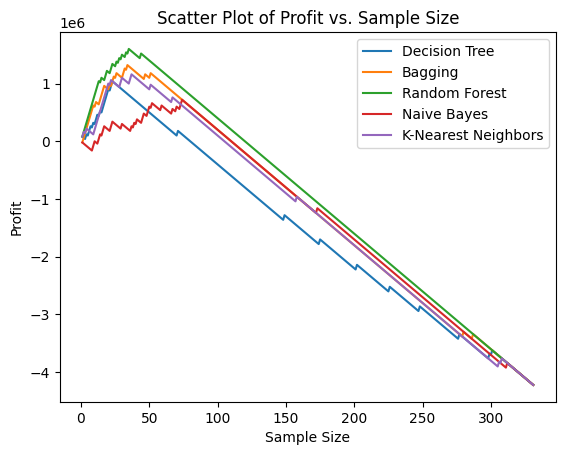

Max Profit: $1600000
Threshold: 0.102719


In [ ]:
# your code with appropriate visualizations for each model here

#Decision Tree
decision_tree_model = DecisionTreeClassifier(criterion = "entropy", max_depth = 6, random_state=3, min_samples_leaf = 1, min_samples_split = 3).fit(X_train, y_train)


#Bagging
base_estimator = DecisionTreeClassifier(criterion='entropy', max_depth=4, min_samples_split=5, min_samples_leaf=1)
bagging_model = BaggingClassifier(estimator=base_estimator, n_estimators=5, random_state=3).fit(X_train, y_train)

#Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X_train, y_train)

#Naive Bayes
MultinomiaNB_model = MultinomialNB(alpha=0.1, fit_prior=True).fit(X_train, y_train) # alpha is usually > 0.1 , < 5,

#K Nearest Neighbors
KNeighbors_model = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto').fit(X_train,y_train)

models = [decision_tree_model, bagging_model, random_forest_model, MultinomiaNB_model, KNeighbors_model]

for model in models:
    # Convert X to NumPy array
    X_train_array = X_train.values
    # Using 10-fold cross validation
    acc_score = cross_val_score(model, X_train_array, y_train, cv=10, scoring="accuracy")
    roc_score = cross_val_score(model, X_train_array, y_train, cv=10, scoring="roc_auc")

    print(f'{model.__class__.__name__} Accuracy Score: {acc_score.mean()}')
    print(f'{model.__class__.__name__} ROC AUC: {roc_score.mean()}\n')


prob_df = pd.DataFrame()

prob_df['Actual Class'] = y_train
dt_prob_df = prob_df.iloc[:]
bagging_prob_df = prob_df.iloc[:]
rf_prob_df = prob_df.iloc[:]
nb_prob_df = prob_df.iloc[:]
knn_prob_df = prob_df.iloc[:]

dt_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(decision_tree_model, X_train, y_train, cv = 10, method = 'predict_proba')]
bagging_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(bagging_model, X_train, y_train, cv = 10, method = 'predict_proba')]
rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(random_forest_model, X_train, y_train, cv = 10, method = 'predict_proba')]
nb_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(MultinomiaNB_model, X_train, y_train, cv = 10, method = 'predict_proba')]
knn_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(KNeighbors_model, X_train, y_train, cv = 10, method = 'predict_proba')]

dt_prob_df = dt_prob_df.sort_values("prob", ascending = False)
bagging_prob_df = bagging_prob_df.sort_values("prob", ascending = False)
rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)
nb_prob_df = nb_prob_df.sort_values("prob", ascending = False)
knn_prob_df = knn_prob_df.sort_values("prob", ascending = False)

vals = [n/331 for n in range(0,331)]

dt_profit = 0
dt_y_val = []
for row in dt_prob_df.iterrows():
  if(row[1][0]):
    dt_profit += 80000
  else:
    dt_profit -= 20000
  dt_y_val.append(dt_profit)

bagging_profit = 0
bagging_y_val = []
for row in bagging_prob_df.iterrows():
  if(row[1][0]):
    bagging_profit += 80000
  else:
    bagging_profit -= 20000
  bagging_y_val.append(bagging_profit)

rf_profit = 0
rf_y_val = []
for row in rf_prob_df.iterrows():
  if(row[1][0]):
    rf_profit += 80000
  else:
    rf_profit -= 20000
  rf_y_val.append(rf_profit)

nb_profit = 0
nb_y_val = []
for row in nb_prob_df.iterrows():
  if(row[1][0]):
    nb_profit += 80000
  else:
    nb_profit -= 20000
  nb_y_val.append(nb_profit)

knn_profit = 0
knn_y_val = []
for row in knn_prob_df.iterrows():
  if(row[1][0]):
    knn_profit += 80000
  else:
    knn_profit -= 20000
  knn_y_val.append(knn_profit)



sample_size = range(1, len(dt_prob_df)+1)
plt.plot(sample_size, dt_y_val, label = 'Decision Tree')

sample_size = range(1, len(bagging_prob_df)+1)
plt.plot(sample_size, bagging_y_val, label = 'Bagging')

sample_size = range(1, len(rf_prob_df)+1)
plt.plot(sample_size, rf_y_val, label = 'Random Forest')

sample_size = range(1, len(nb_prob_df)+1)
plt.plot(sample_size, nb_y_val, label = 'Naive Bayes')

sample_size = range(1, len(knn_prob_df)+1)
plt.plot(sample_size, knn_y_val, label = 'K-Nearest Neighbors')

plt.title('Scatter Plot of Profit vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Profit')
plt.legend()
plt.show()






#threshold and profit
profit = max(rf_y_val)
threshold = -1
for each, val in enumerate(rf_y_val):
  if val == profit:
    threshold = each

print(f'Max Profit: ${profit}')
print(f'Threshold: {threshold/331:3f}')



Our best model used a random forest model, which produced the highest maximum profit of $1,600,000 and a threshold of 0.102719.

**4.3 Using the model selected in 4.2, formulate clearly the investment strategy you will use to decide which players to invest in. The strategy should include the following:**

**a. Which model to use (along with corresponding parameters, such as number and type of models in bagging ensemble, number of K nearest neighbors, etc.)**

**b. Given your model’s estimated probability of induction, above what probability threshold to invest in a player’s memorabilia.**

**(5 points)**


a. We will use the Random Forest Model with the predictors 'games', 'minutes', 'totalSeasons', 'firstSeason', 'lastSeason','careerEnded', 'yrsRetired2004', 'Position_C', 'Position_F', 'pts_per_game', 'offReb_per_game', 'defReb_per_game', 'reb_per_game', 'asts_per_game', 'turnover_per_game', 'pf_per_game', 'fga_per_game', 'fgm_per_game', 'fta_per_game', 'ftm_per_game', 'tpa_per_game', 'tpm_per_game'. Our model has the parameters: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 50}


b. Our probability threshold was 0.102719.

**4.4 Deploy your strategy to the test set**

First, generate predictions for players in the test set and then use these predictions to identify an advantageous probability threshold to use towards your future investments. Use `predict_proba` to get the probability of the predict class.

Hint: use previous homeworks to help with charts if you need it

RandomForestClassifier Accuracy Score: 0.9448529411764707
RandomForestClassifier ROC AUC: 0.9859523809523809



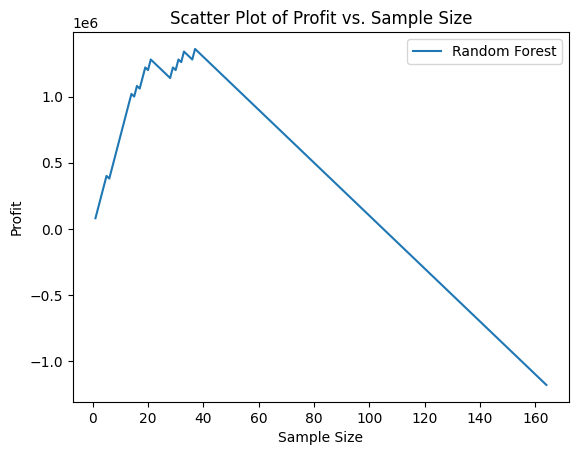

Max Profit: $1360000
Threshold: 0.219512


In [ ]:
#Random Forest
random_forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X_test, y_test)

models = [random_forest_model]

for model in models:
    # Convert X to NumPy array
    X_test_array = X_test.values
    # Using 10-fold cross validation
    acc_score = cross_val_score(model, X_test_array, y_test, cv=10, scoring="accuracy")
    roc_score = cross_val_score(model, X_test_array, y_test, cv=10, scoring="roc_auc")

    print(f'{model.__class__.__name__} Accuracy Score: {acc_score.mean()}')
    print(f'{model.__class__.__name__} ROC AUC: {roc_score.mean()}\n')


prob_df = pd.DataFrame()

prob_df['Actual Class'] = y_test
rf_prob_df = prob_df.iloc[:]

rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(random_forest_model, X_test, y_test, cv = 10, method = 'predict_proba')]

rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)

rf_profit = 0
rf_y_val = []
for row in rf_prob_df.iterrows():
  if(row[1][0]):
    rf_profit += 80000
  else:
    rf_profit -= 20000
  rf_y_val.append(rf_profit)

sample_size = range(1, len(rf_prob_df)+1)
plt.plot(sample_size, rf_y_val, label = 'Random Forest')

plt.title('Scatter Plot of Profit vs. Sample Size')
plt.xlabel('Sample Size')
plt.ylabel('Profit')
plt.legend()
plt.show()






#threshold and profit
profit = max(rf_y_val)
threshold = -1
for each, val in enumerate(rf_y_val):
  if val == profit:
    threshold = each

print(f'Max Profit: ${profit}')
print(f'Threshold: {threshold/164:3f}')

**4.5 Print the list of players (along with their Example number) you will invest in, and report your profit. (10 points)**

In [ ]:
threshold = 0.219512
test_df = pd.DataFrame()
test_df = new_df

X_test = test_df.drop(columns='class')
y_test = test_df['class']

random_forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X_test, y_test)

test_df['proba'] = [round(pred[1], 4) for pred in random_forest_model.predict_proba(X_test)]

target_df = test_df.sort_values('proba', ascending = False)
target_df = test_df.loc[test_df['proba'] >= threshold]
pd.options.display.max_rows = 200
target_df

,games,minutes,pts,offReb,defReb,reb,asts,stl,blk,turnover,...,lastSeason,careerEnded,yrsRetired2004,class,league_A,league_N,Position_C,Position_F,Position_G,proba
6,472.0,15767.0,9063.0,0.0,0.0,4220.0,815.0,0.0,0.0,0.0,...,1959.0,1.0,45.0,True,0,1,0,1,0,0.8467
10,584.0,19546.0,11544.0,0.0,352.0,2112.0,2121.0,113.0,37.0,1016.0,...,1975.0,1.0,29.0,False,1,0,0,0,1,0.3420
14,1074.0,38113.0,26668.0,2950.0,4219.0,7169.0,2677.0,1378.0,642.0,2669.0,...,1998.0,1.0,6.0,True,0,1,0,1,0,0.8983
24,1100.0,35954.0,15535.0,1459.0,2790.0,4249.0,5499.0,1477.0,675.0,2448.0,...,1989.0,1.0,15.0,False,0,1,0,0,1,0.4513
35,699.0,18443.0,10063.0,0.0,0.0,5940.0,1515.0,0.0,0.0,0.0,...,1958.0,1.0,46.0,True,0,1,0,1,0,0.9800
38,1329.0,45071.0,27409.0,6731.0,9481.0,16212.0,1796.0,1089.0,1732.0,3804.0,...,1994.0,1.0,10.0,True,0,1,1,0,0,0.9117
53,704.0,19075.0,11947.0,0.0,0.0,6663.0,1097.0,0.0,0.0,0.0,...,1963.0,1.0,41.0,True,0,1,1,0,0,0.9580
73,1122.0,39788.0,21586.0,0.0,0.0,5665.0,4540.0,0.0,0.0,0.0,...,1972.0,1.0,32.0,True,0,1,0,0,1,0.9900
80,825.0,30965.0,15581.0,403.0,1523.0,4830.0,5040.0,681.0,59.0,139.0,...,1979.0,1.0,25.0,True,0,1,0,0,1,0.9067
87,745.0,21731.0,13447.0,0.0,0.0,5116.0,2242.0,0.0,0.0,0.0,...,1969.0,1.0,35.0,True,0,1,0,1,0,0.9567


In [ ]:
profit = 0
for c in target_df['class']:
  if c == True:
    profit += 80000
  else:
    profit -= 20000

print(f"Our expected profit is ${profit:,}")

Our expected profit is $3,480,000


#Compeititon aspect

In [ ]:
#competition aspect
X_comp = new_df.drop(columns='class')
y_comp = new_df['class']

random_forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3)
models = [random_forest_model]

for model in models:
    acc_score = cross_val_score(model, X_comp, y_comp, cv=10, scoring="accuracy")
    roc_score = cross_val_score(model, X_comp, y_comp, cv=10, scoring="roc_auc")

    print(f'{model.__class__.__name__} Accuracy Score: {acc_score.mean()}')
    print(f'{model.__class__.__name__} ROC AUC: {roc_score.mean()}\n')


prob_df = pd.DataFrame()

prob_df['Actual Class'] = y_comp
rf_prob_df = prob_df.iloc[:]

rf_prob_df['prob'] = [round(pred[1],4) for pred in cross_val_predict(random_forest_model, X_comp, y_comp, cv = 10, method = 'predict_proba')]

rf_prob_df = rf_prob_df.sort_values("prob", ascending = False)

rf_profit = 0
rf_y_val = []
for row in rf_prob_df.iterrows():
  if(row[1][0]):
    rf_profit += 80000
  else:
    rf_profit -= 20000
  rf_y_val.append(rf_profit)

#threshold and profit
profit = max(rf_y_val)
threshold = -1
for each, val in enumerate(rf_y_val):
  if val == profit:
    threshold = each

print(f'Max Profit: ${profit}')
print(f'Threshold: {threshold/164:3f}')


RandomForestClassifier Accuracy Score: 0.9858367346938776
RandomForestClassifier ROC AUC: 0.9995555555555555

Max Profit: $3420000
Threshold: 0.292683


In [ ]:
threshold = 0.292683
test_df = pd.DataFrame()
test_df = new_df

X_test = test_df.drop(columns='class')
y_test = test_df['class']

random_forest_model = RandomForestClassifier(n_estimators=50, criterion='entropy', max_depth=None, min_samples_split=2, min_samples_leaf=2, random_state=3).fit(X_test, y_test)

test_df['proba'] = [round(pred[1], 4) for pred in random_forest_model.predict_proba(X_test)]

target_df = test_df.sort_values('proba', ascending = False)
target_df = test_df.loc[test_df['proba'] >= threshold]
pd.options.display.max_rows = 200

profit = 0
for c in target_df['class']:
  if c == True:
    profit += 80000
  else:
    profit -= 20000

print(f"Our expected profit is ${profit:,}")

Our expected profit is $3,580,000


In [ ]:
X_PGA.to_csv('/content/CCdata.csv', index=False)
target_df.to_csv('/content/playerslist.csv', index=False)

## Attribute Descriptions

Field | Description
------|------------
league| N = National Basketball Association (NBA); A = American Basketball Association (ABA)
games|games played
minutes|minutes played
pts|points
offReb|offensive rebounds
defReb|defensive rebounds
reb|rebounds
asts|assists
stl|steals* (see below)
blk|blocks* (see below)
turnover|turnovers* (see below)
pf|Personal Fouls
fga|field goals attempted
fgm|field goals made
fta|free throws attempted
ftm|free throws made
tpa|three pointers attempted* (see below)
tpm|three pointers made* (see below)
totalSeasons|Total number of seasons played. This value is calculated as follows: "lastSeason - firstSeason + 1"
position|C = Center; F = Forward; G = Guard
firstSeason|First season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season).
lastSeason|Last season played. The year corresponds to the first year of the season (i.e. a value of 2000 represents the 2000-2001 season). Note that 2004 (2004-2005 season) is the last year for which there is data.
careerEnded|Boolean field for if the player's career has ended (1 if career has ended, 0 otherwise). This field was calculated as follows: if the "lastSeason" field is earlier than 2004, the value is 1, otherwise 0. Note that this calculation naively assumes that no players retired at the end of the 2004  season.
yrsRetired2004|The number of seasons that a player has been retired as of the 2004-2005 season.
class|A Boolean field showing whether or not a player was inducted to the Basketball Hall of Fame (HoF) as a player. This field has value 1 if the player has been inducted, and 0 otherwise.




* The NBA did not have three point shots until 1979
* Steals, Blocks and Turnovers were not recorded in the NBA until 1973